In [1]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [71]:
data=pd.read_csv("0705_1.csv")

interaction_array=np.array(data['interactions'])
interaction_with_array=np.array(data['target_obj'])
action_array=np.array(data['action'])

In [72]:
data

,time,x,y,action,interactions,target_obj
0,2023-07-05 15:24:02.175896,9,256,walking,none,none
1,2023-07-05 15:24:02.380739,23,268,walking,none,none
2,2023-07-05 15:24:02.586178,51,280,walking,none,none
3,2023-07-05 15:24:02.790289,65,282,walking,none,none
4,2023-07-05 15:24:02.995030,102,292,walking,none,none
...,...,...,...,...,...,...
816,2023-07-05 15:26:59.094280,120,93,walking,none,none
817,2023-07-05 15:26:59.300249,104,111,walking,none,none
818,2023-07-05 15:26:59.505139,102,113,walking,none,none
819,2023-07-05 15:26:59.712652,74,145,standing,none,none


In [73]:
data = data[(data['action'] != 'walking') | (data['interactions'] != 'none')]

In [74]:
data2=data.loc[:,['x','y']]

In [75]:
data2

,x,y
15,414,260
16,424,268
17,434,254
20,487,241
21,492,254
...,...,...
794,573,166
795,542,166
796,521,159
797,539,128


In [76]:
data3 = [list(e) for e in zip(data['x'],data['y'])]

In [77]:
data3

[[414, 260],
 [424, 268],
 [434, 254],
 [487, 241],
 [492, 254],
 [500, 236],
 [503, 236],
 [497, 234],
 [493, 219],
 [488, 223],
 [501, 191],
 [462, 169],
 [453, 175],
 [466, 189],
 [461, 202],
 [469, 200],
 [478, 198],
 [474, 199],
 [459, 208],
 [452, 211],
 [461, 217],
 [474, 206],
 [475, 189],
 [472, 190],
 [470, 192],
 [476, 188],
 [466, 205],
 [462, 213],
 [467, 207],
 [463, 219],
 [464, 213],
 [467, 213],
 [471, 214],
 [465, 219],
 [454, 227],
 [479, 185],
 [479, 186],
 [480, 186],
 [454, 198],
 [451, 207],
 [454, 201],
 [451, 212],
 [451, 198],
 [460, 198],
 [459, 208],
 [474, 206],
 [454, 204],
 [446, 199],
 [458, 201],
 [456, 209],
 [453, 203],
 [454, 206],
 [448, 203],
 [453, 201],
 [449, 206],
 [451, 197],
 [451, 200],
 [447, 197],
 [460, 196],
 [453, 197],
 [449, 197],
 [454, 197],
 [458, 181],
 [456, 181],
 [489, 183],
 [510, 217],
 [501, 246],
 [503, 236],
 [507, 244],
 [522, 216],
 [503, 237],
 [476, 241],
 [440, 252],
 [431, 248],
 [414, 241],
 [384, 258],
 [304, 325],

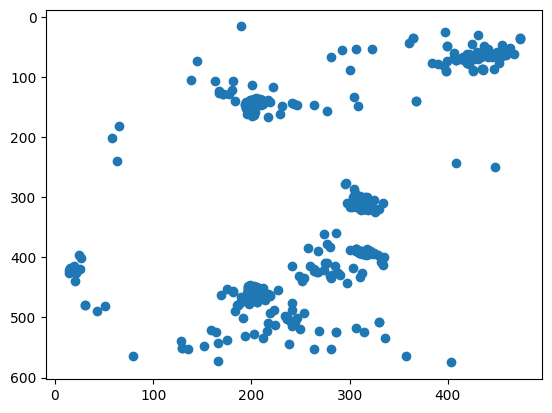

In [80]:
# data=pd.read_csv("20230623.csv")
plt.gca().invert_yaxis()  # y軸を反転する
data = data[(data['action'] != 'walking') | (data['interactions'] != 'none')]
plt.scatter(data.loc[:, ['y']], data.loc[:, ['x']])

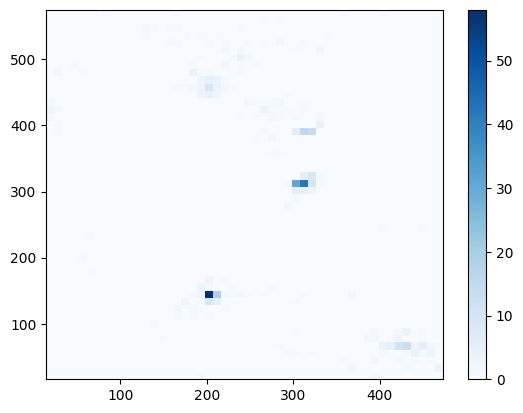

In [81]:
# data=pd.read_csv("20230623.csv")
plt.hist2d(data['y'], data['x'], bins=50, cmap='Blues')
plt.colorbar()
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc80d94ff70>
Traceback (most recent call last):
  File "/home/ozaki/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ozaki/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ozaki/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ozaki/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

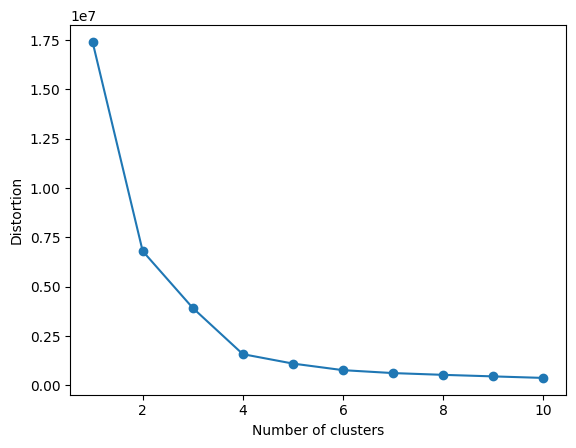

In [82]:
#elbow
distortions = []

for i in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data3)                        
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [83]:
N=4

In [84]:
km = KMeans(n_clusters=N, random_state=42)
label = km.fit_predict(data2[:])

In [85]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

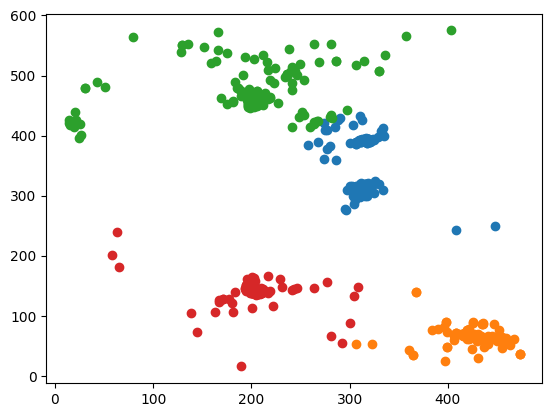

In [86]:
plt.gca().invert_yaxis()  # y軸を反転する
plt.gca().invert_yaxis()  # y軸を反転する
for i in range(N):
    plt.scatter(data.loc[:, ['y']][label==i], data.loc[:, ['x']][label==i])
# plt.scatter(data.loc[:, ['z']][label==0], data.loc[:, ['x']][label==0])
# plt.scatter(data.loc[:, ['z']][label==1], data.loc[:, ['x']][label==1])
# plt.scatter(data.loc[:, ['z']][label==2], data.loc[:, ['x']][label==2])
# plt.scatter(data.loc[:, ['z']][label==3], data.loc[:, ['x']][label==3])
plt.show()

In [87]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [88]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

[0.49771526, 0.30596492, 0.3631886, 0.35386556]
[0.52210647, 0.3422728, 0.3727542, 0.5533186]
[0.51496667, 0.34052613, 0.3732745, 0.5399489]
[0.43266922, 0.31932697, 0.41979924, 0.38140476]


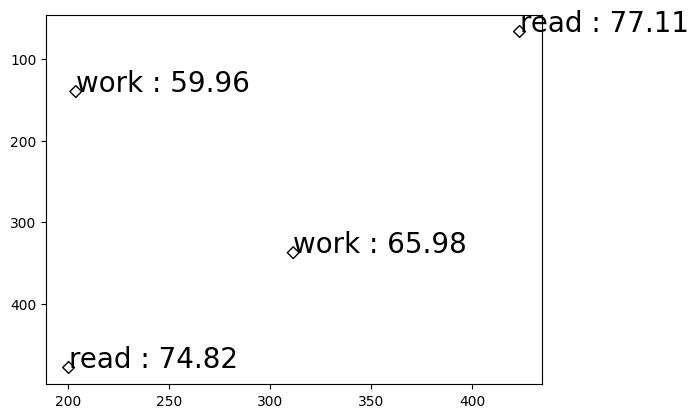

In [97]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

observedList1 =[]
for i in ddList1:
    if(interaction_array[i]!="none"):
        observedList1.append(interaction_array[i])
        if(action_array[i]=="laying"):
            observedList1.append(action_array[i])
        observedList1.append(interaction_with_array[i])

observedList2 =[]
for i in ddList2:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList2.append(action_array[i])
        observedList2.append(interaction_array[i])
        observedList2.append(interaction_with_array[i]) 

observedList3 =[]
for i in ddList3:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList3.append(action_array[i])
        observedList3.append(interaction_array[i])
        observedList3.append(interaction_with_array[i])

observedList4 =[]
for i in ddList4:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList4.append(action_array[i])
        observedList4.append(interaction_array[i])
        observedList4.append(interaction_with_array[i])

split_values = []
original_values = []
for item in observedList1:
    split_items = item.split(',')
    split_values.extend(split_items)
    original_values.extend([item] * len(split_items))

split_values2 = []
original_values2 = []
for item in observedList2:
    split_items = item.split(',')
    split_values2.extend(split_items)
    original_values2.extend([item] * len(split_items))

split_values3 = []
original_values3 = []
for item in observedList3:
    split_items = item.split(',')
    split_values3.extend(split_items)
    original_values3.extend([item] * len(split_items))

split_values4 = []
original_values4 = []
for item in observedList4:
    split_items = item.split(',')
    split_values4.extend(split_items)
    original_values4.extend([item] * len(split_items))

centers = km.cluster_centers_
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(centers[:, 1], centers[:, 0], marker="D", facecolors='none', edgecolors='black')
observed_lists = [split_values, split_values2, split_values3, split_values4]
utilization_class_list = ['work','relax','dining','read']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    if prob>50:
        plt.text(centers[i][1], centers[i][0], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][1], centers[i][0], f"unknown", fontsize=20)


In [ ]:
similar_list = model.most_similar('work')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

works : 0.717581570148468
working : 0.6682043671607971
job : 0.6681519746780396
Work : 0.642331063747406
work. : 0.6332440972328186
research : 0.6295222640037537
work- : 0.6242907047271729
doing : 0.6225779056549072
effort : 0.6146255731582642
work-- : 0.6137425303459167


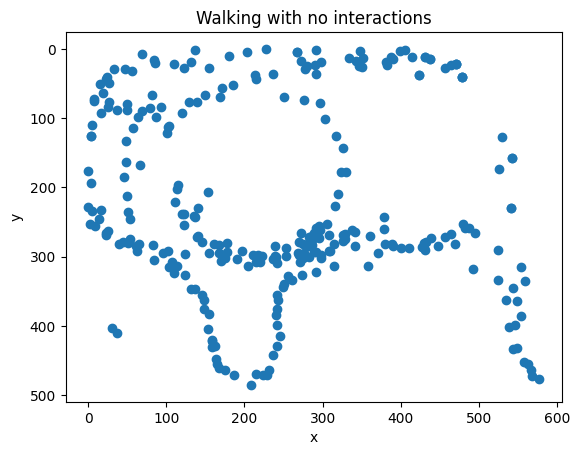

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('0705_1.csv')

# 条件に合致する行を抽出する
filtered_df = df[(df['action'] == 'walking') & (df['interactions'] == 'none')]

# x列とy列を取得
x_values = filtered_df['x']
y_values = filtered_df['y']

# プロット
plt.scatter(x_values, y_values)
plt.gca().invert_yaxis()  # y軸を反転する
plt.xlabel('x')
plt.ylabel('y')
plt.title('Walking with no interactions')
plt.show()
